In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'/home/kyle/GWA/NANOGrav/PsrSigSim/')
import psrsigsim as PSS
import numpy as np

In [3]:
#Bokeh imports
from bokeh.io import curdoc, output_file, show, output_notebook
from bokeh.layouts import column, row, widgetbox
from bokeh.models import ColumnDataSource, Range1d, LinearColorMapper
import bokeh.models.widgets as widgets
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [14]:
#Default values for psr_dict----------------------------------------------------
psr_dict = {}
psr_dict['f0'] = 1150                   #Central frequency
psr_dict['F0'] = 218                    #Pulsar spin freq
psr_dict['bw'] = 1700                    #Bandwidth
psr_dict['Nf'] = 34                    #Frequency bins
psr_dict['ObsTime'] = 20                #Observation time
psr_dict['f_samp'] = .4                  #Sampling frequency
psr_dict['SignalType'] = "intensity"    #'intensity' which carries a Nf x Nt
#filterbank of pulses or 'voltage' which carries a 4 x Nt array of
#voltage vs. time pulses representing 4 stokes channels
psr_dict['dm'] = 0.00001                      #Dispersion Measure Pescs/(CM^3)
# V_ISS -- Intersteller Scintilation Velocity
#psr_dict['scint_bw'] =  15.6            #Scintilation Bandwidth
psr_dict['tau_scatter'] =0.000001       #Scattering Timescale
# pulsar -- pulsar name
# telescope -- telescope name(GBT or Arecibo)
psr_dict['freq_band'] = 1400            #Frequency band [327 ,430, 820, 1400, 2300]
# aperature -- aperature (m)
# area -- collecting area (m^2)
# Tsys -- system temp (K), total of receiver, sky, spillover, etc. (only needed for noise)
# name -- GBT or Arecibo
# tau_scatter -- scattering time (ms)
psr_dict['radiometer_noise'] =  False  #radiometer noise
psr_dict['data_type']='float32'         #Was int8
psr_dict['flux'] = 80
psr_dict['to_DM_Broaden'] = False
psr_dict['to_Scatter_Broaden_exp'] = False


#Constants for generating data--------------------------------------------------
dm_range = (0,10)
dm_range_spacing = 1
NumPulses = 1
startingPeriod = 0
start_time = (startingPeriod / psr_dict['F0']) *1000  #Getting start time in ms
TimeBinSize = (1.0/psr_dict['f_samp']) * 0.001
start_bin = int((start_time)/TimeBinSize)
stop_time = (((1 / psr_dict['F0']) *1000) * NumPulses) + start_time
# start_time + however many pulses times the pulsar period in ms
stop_bin =int((stop_time)/TimeBinSize)
first_freq = psr_dict['f0']-(psr_dict['bw']/2)
last_freq = psr_dict['f0']+(psr_dict['bw']/2)
FullData = None

In [44]:
psr = PSS.Simulation(psr =  None , sim_telescope= 'GBT',
                             sim_ism= None, sim_scint= None,
                             sim_dict = psr_dict)

In [106]:
psr.init_signal()
psr.init_pulsar()
psr.init_ism()
psr.init_telescope()
psr.pulsar.gauss_template(peak=.5)

In [107]:
psr.simulate()

47% dispersed in 0.113 seconds.

/home/kyle/anaconda3/lib/python3.5/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


100% dispersed in 0.220 seconds.

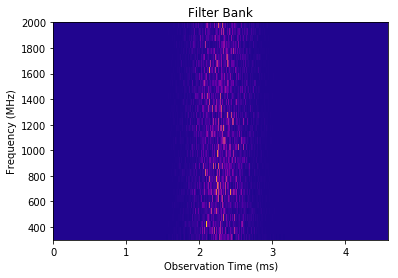

In [108]:
psr.signal.filter_bank()

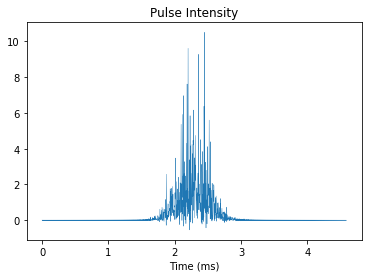

In [109]:
psr.signal.pulse_plot()

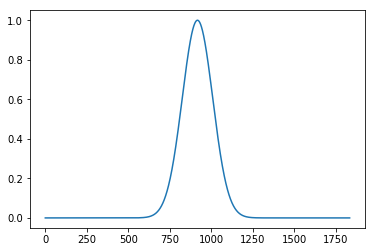

1835


In [110]:
plt.plot(psr.pulsar.profile[0,:])
plt.show()
print(psr.pulsar.profile.shape[1])


In [111]:
fig = figure(plot_width = 400, plot_height = 400)
fig.line(x = np.linspace(0,1,psr.pulsar.profile.shape[1]), y = psr.pulsar.profile[0,:])
show(fig)

In [51]:
x = 1957.5
print(int((x-342.5)/85))

19


In [112]:
src1 = ColumnDataSource(dict(x = np.linspace(0,1,psr.pulsar.profile.shape[1]), 
                             y = psr.pulsar.profile[0,:] ) )

fig1 = figure(plot_width = 400, plot_height = 400, 
              #x_range = Range1d(start_time,stop_time), 
              y_range = Range1d(0,1),
              x_axis_label = 'Pulse Phase',
              y_axis_label = 'Pulse Intensity',)

fig1.line(source = src1, x='x', y='y',)

show(fig1)

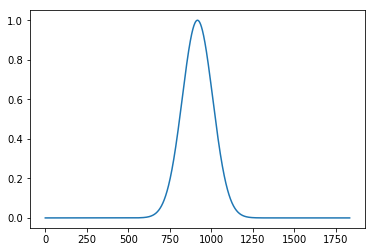

In [113]:
plt.plot(psr.pulsar.profile[-1,:])
plt.show()

In [114]:
psr.obs_signal.shape

AttributeError: 'Simulation' object has no attribute 'obs_signal'

In [41]:
import matplotlib.pyplot as plt
% matplotlib inline

In [42]:
psr.pulsar.gauss_template(peak=.5)
psr.simulate()

79% dispersed in 0.147 seconds.

/home/kyle/anaconda3/lib/python3.5/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


100% dispersed in 0.179 seconds.

In [43]:
plt.imshow(psr.obs_signal,origin='left',aspect='auto')
plt.show()

AttributeError: 'Simulation' object has no attribute 'obs_signal'

In [ ]:
allData = psr.obs_signal
sumData = np.sum(allData,axis=0)
print(sumData.shape)

In [ ]:
temp2 = sumData
length = stop_bin - start_bin
height = int(temp2.shape[0]/length)+1
temp2 = np.resize(temp2,length*height)
temp2 = np.reshape(temp2,(length,height))
print(temp2.shape)

In [ ]:
phase= np.linspace(0,1,temp2.shape[0])
plt.figure(figsize=[10,6])
plt.plot(phase,np.sum(temp2[:,:],axis=1),lw=0.3)
plt.show()

In [105]:
sig=psr.obs_signal +0.07*psr.signal.signal[:]

AttributeError: 'Simulation' object has no attribute 'obs_signal'

In [ ]:
plt.imshow(sig,origin='left',aspect='auto')
plt.show()

In [ ]:
n=100
phase= np.linspace(0,1,sig.shape[1])
plt.figure(figsize=[10,6])
plt.plot(phase,np.sum(sig[:n,:],axis=0),lw=0.3)
plt.show()

In [ ]:
temp = sig[:,start_bin:stop_bin]
print(temp.shape)
phase= np.linspace(0,1,temp.shape[1])
plt.figure(figsize=[10,6])
plt.plot(phase,np.sum(temp,axis=0),lw=0.3)
plt.show()

In [ ]:
foldingFreq = 218 #in MHz
foldingPeriod = (1.0/foldingFreq)*1000
foldingBin = int(foldingPeriod/TimeBinSize)
toShow = np.copy(np.swapaxes(sig[:,start_bin:stop_bin],0,1))
totalNum = toShow.shape[0] * toShow.shape[1]
height = int(totalNum / foldingBin) + 1
toShow.resize(foldingBin,height)
toShow = np.sum(toShow,axis=1)
phase= np.linspace(0,1,toShow.shape[0])
plt.figure(figsize=[10,6])
plt.plot(phase,toShow,lw=0.3)
plt.show()

In [ ]:
temp5 = np.copy(temp)
print(np.size(temp5))

In [ ]:
foldingFreq = 234 #in MHz (period of the pulsar will show a pulse)
foldingPeriod = (1.0/foldingFreq)*1000 #Given a frequency, what is the period
foldingBin = int(foldingPeriod/TimeBinSize) #length of that period in terms of time bins
toShow = np.copy(np.swapaxes(sig[:,start_bin:stop_bin],0,1)) #Deep copy of the data with swapped axis
#Need to swap axis so that resize will work on the correct axis
totalNum = toShow.shape[0] * toShow.shape[1] #Total Datapoints
height = int(totalNum / foldingBin) + 1 #Given the folding frequency, this would be how many times we fold
toShow.resize(foldingBin,height) #Resizing to the given specs
toShow = np.sum(toShow,axis=1) #summing the data points along the folded axis

In [ ]:
PreFoldingData = np.copy(np.swapaxes(sig[:,start_bin:stop_bin],0,1))
PostFoldingData = None
foldingPeriod = (1.0/foldingFreq)*1000 #Given a frequency, what is the period
foldingBin = int(foldingPeriod/TimeBinSize) #length of period in terms of time binss
totalNum = PreFoldingData.size #Total Datapoints
height = int(totalNum / foldingBin) + 1 #Given the folding frequency, this would be how many times we fold
PostFoldingData= np.resize(PreFoldingData,(foldingBin,height)) #Resizing to the given specs
PostFoldingData= np.sum(PostFoldingData,axis=1) #summing the data points along the folded axis

In [ ]:
src2 = ColumnDataSource(data = dict(x = np.linspace(0,1,PostFoldingData.shape[0]), 
                             y = PostFoldingData ) )

fig2 = figure(plot_width = 400, plot_height = 400, 
              #x_range = Range1d(start_time,stop_time), 
              y_range = Range1d(0,25),
              x_axis_label = 'Phase',
              y_axis_label = 'Pulse Intensity',)

fig2.line(source = src2, x='x', y='y',)

show(fig2)

In [115]:
plt.plot(psr.obs_signal[10,:])
plt.show()

AttributeError: 'Simulation' object has no attribute 'obs_signal'

In [116]:
sig1 = psr.signal.signal[:,start_bin:stop_bin]
sig2 = np.swapaxes(sig1,0,1)
#print(np.array_equal(sig1,sig2))
pre = np.copy(sig2)


In [100]:
print(sig2)
print()
print(pre)


[[-5.6987167e-03  1.7180070e-03  4.1556829e-03 ... -2.6027139e-04
  -7.0029826e-05 -4.7508067e-05]
 [ 4.5607663e-03 -2.5649206e-04 -2.4612814e-03 ...  2.7586520e-04
   4.6930600e-05  6.9364141e-05]
 [-3.8982367e-03 -2.2951438e-04  2.2440967e-03 ... -2.6951873e-04
  -3.5126952e-05 -7.2372510e-05]
 ...
 [ 5.5987467e-03 -7.4006449e-03  2.3720418e-03 ... -2.0214217e-04
   4.8789334e-05 -2.2814304e-04]
 [-5.5989251e-03  7.3996498e-03 -2.3659195e-03 ...  2.0233635e-04
  -4.8229227e-05  2.2854812e-04]
 [ 5.5995183e-03 -7.3980307e-03  2.3598208e-03 ... -2.0253750e-04
   4.8589343e-05 -2.2860739e-04]]

[[-5.6987167e-03  1.7180070e-03  4.1556829e-03 ... -2.6027139e-04
  -7.0029826e-05 -4.7508067e-05]
 [ 4.5607663e-03 -2.5649206e-04 -2.4612814e-03 ...  2.7586520e-04
   4.6930600e-05  6.9364141e-05]
 [-3.8982367e-03 -2.2951438e-04  2.2440967e-03 ... -2.6951873e-04
  -3.5126952e-05 -7.2372510e-05]
 ...
 [ 5.5987467e-03 -7.4006449e-03  2.3720418e-03 ... -2.0214217e-04
   4.8789334e-05 -2.2814304e-04

In [117]:
foldFreq = 436 #in MHz (period of the pulsar will show a pulse)
foldBin = int(((1.0/foldFreq)*1000)/TimeBinSize) #length of that period in terms of time bins
hei = int((pre.size/foldBin) + 1)

print(pre.shape)
#pre = np.reshape(pre,(pre.size,1))
print(pre.shape)
post = np.copy(pre)
print(post)
print(post.shape)
post = np.resize(post,(foldBin,hei))
print(post.shape)
post = np.sum(post,axis=1)
print(post.shape)
print(post)

(1834, 34)
(1834, 34)
[[ 9.3829306e-03  6.9168764e-03  6.4197811e-03 ...  4.7164729e-05
   2.9128316e-04  8.7212298e-05]
 [-9.5413653e-03 -6.5029166e-03 -5.3562238e-03 ...  7.0769856e-05
  -8.5379499e-05 -1.0025959e-04]
 [ 9.6085006e-03  6.2730280e-03  5.1743537e-03 ... -9.6802098e-05
   2.9584913e-05  1.0286909e-04]
 ...
 [ 7.2192331e-03  2.7673971e-03 -4.1556219e-04 ... -1.6954816e-04
   5.4512046e-05  3.9222368e-04]
 [-7.2084302e-03 -2.7680127e-03  4.1898448e-04 ...  1.7002897e-04
  -5.4530305e-05 -3.9213136e-04]
 [ 7.1975677e-03  2.7690439e-03 -4.2307281e-04 ... -1.7012721e-04
   5.4622415e-05  3.9212347e-04]]
(1834, 34)
(917, 69)
(917,)
[ 2.48894859e-02  8.00795853e-03  5.48483059e-03  7.38148083e-05
  2.71056476e-03 -1.21827400e-03 -1.55520812e-03  1.68673752e-03
  4.01737343e-04  9.60099132e-05 -8.33499536e-04  2.22796516e-04
 -1.21249926e-04 -1.06912665e-03  7.26160069e-05  2.21922419e-05
  1.06274756e-03 -2.05000528e-04 -4.01998317e-04 -4.34214133e-04
 -1.36001065e-04 -4.55248

In [119]:
src3 = ColumnDataSource(data = dict(x = np.linspace(0,1,post.shape[0]), 
                             y = post ) )

fig3 = figure(plot_width = 400, plot_height = 400, 
              #x_range = Range1d(start_time,stop_time), 
              y_range = Range1d(0,95),
              x_axis_label = 'Phase',
              y_axis_label = 'PulseIntensity',)

fig3.line(source = src3, x='x', y='y',)

show(fig3)